In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E:/pps project/Real Estate Price Prediction/data/chennai_house_price_prediction.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [3]:
df.drop("PRT_ID",axis=1,inplace=True)

In [4]:
len(df)

7109

In [5]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df_temp = pd.DataFrame(df, columns=["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"])

In [7]:
df_temp

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290
...,...,...,...,...
7104,3.0,2.2,2.4,2.520
7105,3.6,4.5,3.3,3.920
7106,4.3,4.2,2.9,3.840
7107,4.6,3.8,4.1,4.160


In [8]:
temp_list = (df["QS_ROOMS"] + df["QS_BATHROOM"] + df["QS_BEDROOM"]) / 3

In [9]:
temp_series = pd.Series(temp_list)

In [10]:
temp_series

0       4.266667
1       3.866667
2       3.366667
3       4.066667
4       3.200000
          ...   
7104    2.533333
7105    3.800000
7106    3.800000
7107    4.166667
7108    3.633333
Length: 7109, dtype: float64

In [11]:
# QS_OVERALL is overall average of 3 features

In [12]:
# Let's impute missing values
for i in range(0,len(df)):
    if(pd.isnull(df["QS_OVERALL"][i])):
        df["QS_OVERALL"] = (df["QS_ROOMS"] + df["QS_BATHROOM"] + df["QS_BEDROOM"]) / 3

In [13]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

<BarContainer object of 7109 artists>

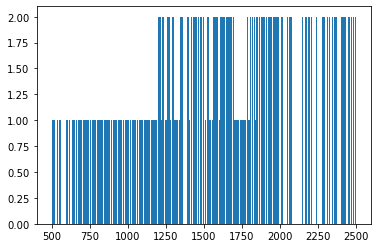

In [14]:
plt.bar(df["INT_SQFT"],df["N_BATHROOM"])

<BarContainer object of 7109 artists>

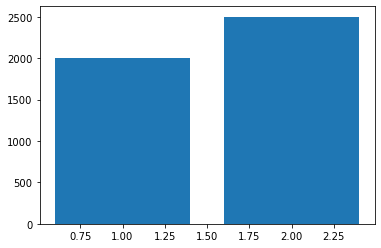

In [15]:
plt.bar(df["N_BATHROOM"],df["INT_SQFT"])

In [16]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [17]:
df = df.astype({"N_BEDROOM":"object", "N_BATHROOM":"object"})

In [18]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

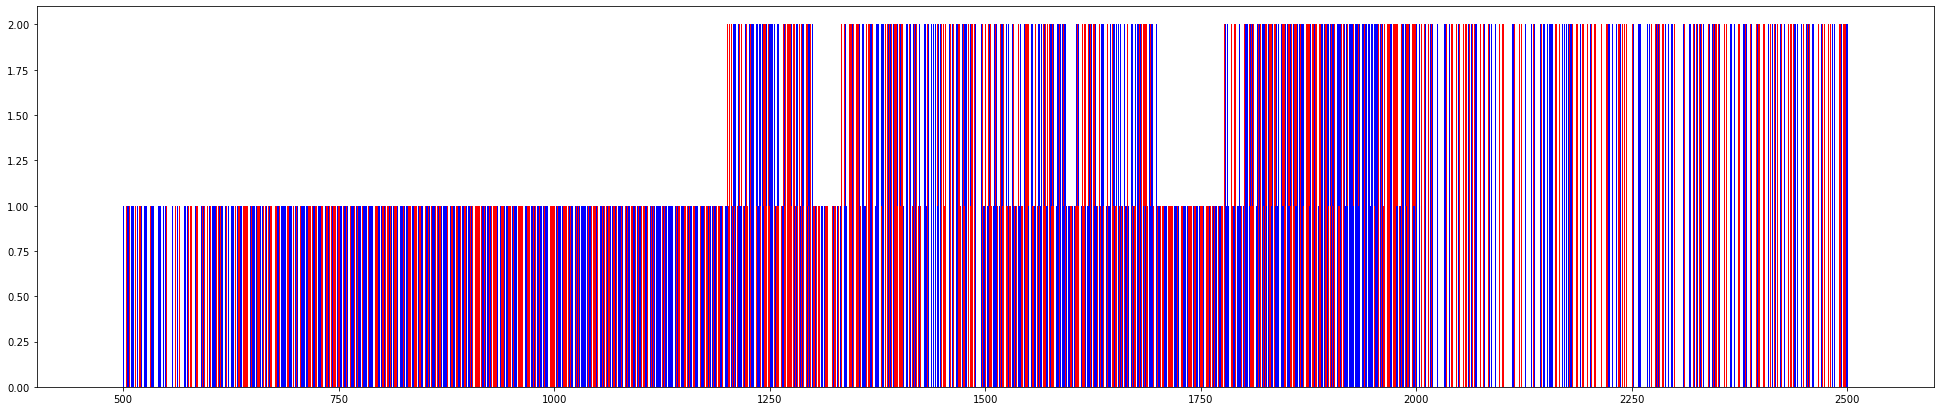

In [19]:
colors = {"Commercial" : "red" , "House" : "blue" , "Others" : "green"}
plt.figure(figsize=(34,7))
# plt.bar(df["INT_SQFT"],df["N_BATHROOM"],color.apply(lambda x:colors[x]))
plt.bar(df["INT_SQFT"],df["N_BATHROOM"],color=["red","blue"])
plt.show()

In [20]:
for i in range(0,len(df)):
    if(pd.isnull(df["N_BATHROOM"][i])):
        if(df["INT_SQFT"][i] >= 2020):
            df["N_BATHROOM"][i] = 2
        elif(df["INT_SQFT"][i] <= 1062.5):
            df["N_BATHROOM"][i] = 1
        else:
            df["N_BATHROOM"][i] = 1

<ipython-input-20-1f7668b03d55>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_BATHROOM"][i] = 1
<ipython-input-20-1f7668b03d55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_BATHROOM"][i] = 1


In [21]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [22]:
df["N_BEDROOM"].mode()

0    1
dtype: object

In [23]:
for i in range(0,len(df)):
    if(pd.isnull(df["N_BEDROOM"][i])):
        df["N_BEDROOM"][i] = 1

<ipython-input-23-aa34c0c50abb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_BEDROOM"][i] = 1


In [24]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [25]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [26]:
df =  df.astype({"N_ROOM":"object"})

In [27]:
######################################################################################

In [28]:
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [29]:
for i in range(0,len(df)):
    if((df["AREA"][i] == 'Chrompt') or (df["AREA"][i] == "Chormpet") or (df["AREA"][i] == "Chrmpet")):
        df["AREA"][i] = "Chrompet"
    if(df["AREA"][i] == "TNagar"):
        df["AREA"][i] = "T Nagar"
    if(df["AREA"][i] == "Karapakam"):
        df["AREA"][i] = "Karapakkam"
    if((df["AREA"][i] == "Ana Nagar") or (df["AREA"][i] == "Ann Nagar")):
        df["AREA"][i] = "Anna Nagar"
    if(df["AREA"][i] == "Velchery"):
        df["AREA"][i] = "Velachery"
    if(df["AREA"][i] == "KKNagar"):
        df["AREA"][i] = "KK Nagar"
    if(df["AREA"][i] == "Adyr"):
        df["AREA"][i] = "Adyar"

<ipython-input-29-c5288d08328d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AREA"][i] = "T Nagar"
<ipython-input-29-c5288d08328d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AREA"][i] = "Chrompet"
<ipython-input-29-c5288d08328d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AREA"][i] = "Karapakkam"
<ipython-input-29-c5288d08328d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [30]:
df["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [31]:
df["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [32]:
for i in range(0,len(df)):
    if(df["SALE_COND"][i] == "Adj Land"):
        df["SALE_COND"][i] = "AdjLand"
    if(df["SALE_COND"][i] == "Ab Normal"):
        df["SALE_COND"][i] = "AbNormal"
    if((df["SALE_COND"][i] == "Partiall") or (df["SALE_COND"][i] == "PartiaLl")):
        df["SALE_COND"][i] = "Partial"

<ipython-input-32-198326cd45a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SALE_COND"][i] = "AbNormal"
<ipython-input-32-198326cd45a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SALE_COND"][i] = "Partial"
<ipython-input-32-198326cd45a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SALE_COND"][i] = "AdjLand"


In [33]:
df["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [34]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [35]:
df["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [36]:
for i in range(0,len(df)):
    if(df["PARK_FACIL"][i] == "Noo"):
        df["PARK_FACIL"][i] = "No"

<ipython-input-36-f4f40e146b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PARK_FACIL"][i] = "No"


In [37]:
df["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [38]:
for i in range(0,len(df)):
    if(df["BUILDTYPE"][i] == "Other"):
        df["BUILDTYPE"][i] = "Others"
    if(df["BUILDTYPE"][i] == "Comercial"):
        df["BUILDTYPE"][i] = "Commercial"

<ipython-input-38-82330db210ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BUILDTYPE"][i] = "Others"
<ipython-input-38-82330db210ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BUILDTYPE"][i] = "Commercial"


In [39]:
df["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [40]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [41]:
for i in range(0,len(df)):
    if(df["UTILITY_AVAIL"][i] == "AllPub"):
        df["UTILITY_AVAIL"][i] = "AllPub"

<ipython-input-41-dae207b7d686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UTILITY_AVAIL"][i] = "AllPub"


In [42]:
df["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [43]:
for i in range(0,len(df)):
    if(df["STREET"][i] == "Pavd"):
        df["STREET"][i] = "Paved"
    if(df["STREET"][i] == "NoAccess"):
        df["STREET"][i] = "No Access"

<ipython-input-43-0da6d9fbd716>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["STREET"][i] = "Paved"
<ipython-input-43-0da6d9fbd716>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["STREET"][i] = "No Access"


In [44]:
df["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [45]:
df["COMMIS"].value_counts()

117825    3
127189    2
103224    2
177975    2
223620    2
         ..
238313    1
129770    1
219886    1
176883    1
212992    1
Name: COMMIS, Length: 7011, dtype: int64

In [47]:
df.to_csv("after_preprocessing.csv")